In [12]:
## Imported public datasets and libraries for visualation
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

## Data load
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

## Raw data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
## Extracts the job titles and indexes it from the data set
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()

In [27]:
## Defines the top 6 job titles from the data set
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
top_job_titles = df_us.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).head(6)
print(top_job_titles)

job_title_short
Senior Data Scientist        155000.0
Machine Learning Engineer    150000.0
Senior Data Engineer         150000.0
Data Scientist               130000.0
Software Engineer            130000.0
Data Engineer                125000.0
Name: salary_year_avg, dtype: float64


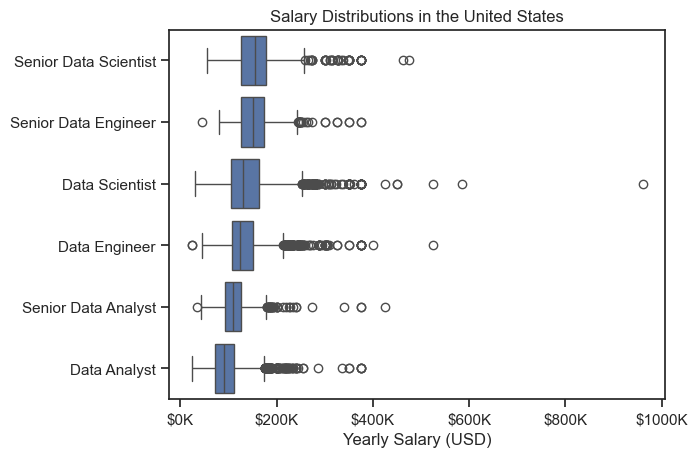

In [ ]:
## Graphs the top 6 job titles in a boxplot
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', order= job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [17]:
## Copies and extracts the salary from data analysts
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [18]:
## Extracts the skills and pay associated with data analysts
df_da_us = df_da_us.explode('job_skills')

df_da_us[['salary_year_avg', 'job_skills']].head(5)


,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [19]:
## Sorts the top paying skills for the data analyst position
df_da_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_da_top_pay = df_da_top_pay.head(10) 

df_da_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [20]:
## Finds the most common data analyst skills along with the pay
df_da_skills = df_da_us.groupby('job_skills') ['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_da_skills = df_da_skills.head(10) 
df_da_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


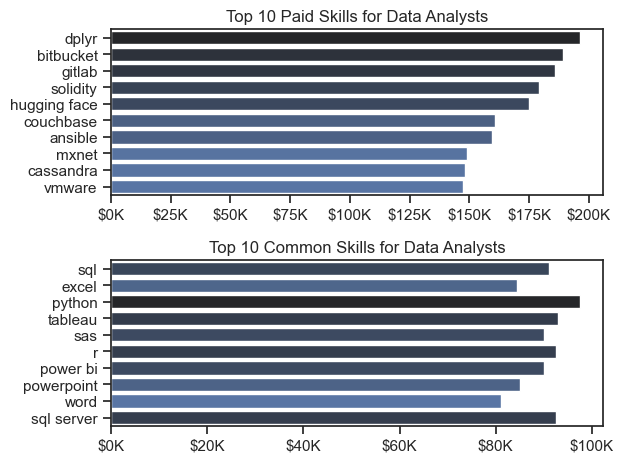

In [21]:
## Plots the top paying data analyst skills and the top occuring data analyst skills 
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
 
ax[0].set_title('Top 10 Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()

sns.set_theme(style='ticks')

sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, hue='median', ax=ax[1], palette='dark:b_r')
ax[1].legend().remove()
 
ax[1].set_title('Top 10 Common Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


fig.tight_layout()